The file EastWest Airlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not




In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
# Normalization function 
def norm_func(i):
    x = (i-i.min()) /(i.max() - i.min())
    return (x)

In [3]:
# Kmeans on University Data set 
Airlines = pd.read_csv('EastWestAirlines1.csv')

#print(Airlines)
Airlines.head(10)
# we dont have any Y 

#ID --Unique ID
#Balance--Number of miles eligible for award travel
#Qual_mile--Number of miles counted as qualifying for Topflight status

#cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
#cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
#cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over 50,000

#Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
#Bonus_trans--Number of non-flight bonus transactions in the past 12 months
#Flight_miles_12mo--Number of flight miles in the past 12 months
#Flight_trans_12--Number of flight transactions in the past 12 months
#Days_since_enrolled--Number of days since enrolled in flier program
#Award--whether that person had award flight (free flight) or not


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [ ]:
#Airlines.info

In [ ]:
Airlines.dtypes

In [ ]:
Airlines.isnull().sum()
# We have null values in our data

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airlines.iloc[:,1:]) # nomalise all columns except oth i.e univ column
# norm_func = func we define to normalise the data
df_norm.head(10)  # Top 10 rows


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


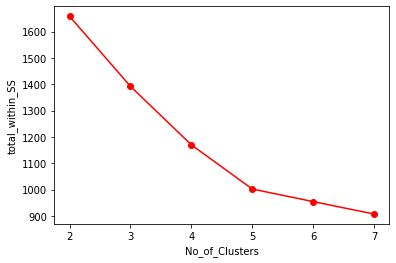

In [5]:
###### scree plot or elbow curve ############
k = list(range(2,8))
# variable for storing total within sum of squares for each kmeans 
TWSS = [] 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    # variable for storing within sum of squares for each cluster 
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.show()

# K-MEANS CLUSTERING

In [6]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 
# i.e the oth record/row belongs to oth cluster 

array([4, 4, 4, ..., 2, 0, 0])

In [8]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Airlines['clust']=model.labels_ # creating a  new column and assigning it to new column 
#df_norm.head()
#print(df_norm)
Airlines.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,4
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2


In [10]:
Airlines = Airlines.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
Airlines.head(10)

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,4,1,28143,0,1,1,1,174,1,0,0,7000,0
1,4,2,19244,0,1,1,1,215,2,0,0,6968,0
2,4,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,4,14776,0,1,1,1,500,1,0,0,6952,0
4,2,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,4,6,16420,0,1,1,1,0,0,0,0,6942,0
6,3,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,1,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,2,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,2,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [ ]:
Airlines.clust.value_counts()

In [9]:
Airlines.iloc[:,1:12].groupby(Airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


# HIERARCHICAL

In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

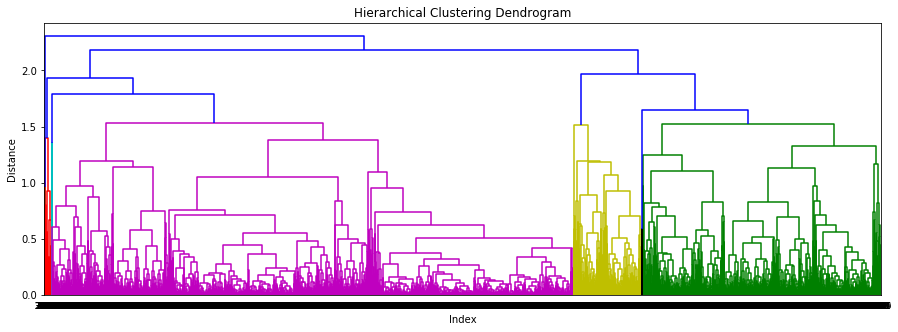

In [12]:
#DENDROGRAM OF COMPLETE LINKAGE METHOD
#p = np.array(df_norm) # converting into numpy array format 
Z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
#DENDROGRAM OF AVERAGE LINKAGE METHOD
#p = np.array(df_norm) # converting into numpy array format 
Z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
#DENDROGRAM OF SINGLE LINKAGE METHOD
#p = np.array(df_norm) # converting into numpy array format 
Z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the dendrogram(optional)
from sklearn.cluster import	AgglomerativeClustering 

h_complete = AgglomerativeClustering( n_clusters=5, linkage='complete', affinity = "euclidean").fit(df_norm) 


cluster_labels=pd.Series(h_complete.labels_) 

h_complete.labels_    ## this is where we have the labels associated with each and every row

In [ ]:
# creating a  new column and assigning it to new column 

Airlines['clust']=cluster_labels
#print(Airlines)
Airlines.head(10)

In [ ]:
Airlines = Airlines.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
Airlines.head(10)

In [ ]:
# getting aggregate mean of each cluster
Airlines.iloc[:,2:].groupby(Airlines.clust).mean()